#### Python for Data Analysis Capstone project

### `By: Igbinedion Joshua`

In [2]:
#Start by importing the required libraries
import pandas as pd
import numpy as np

In [3]:
#Load the given CSV dataset into pandas dataframe
my_df = pd.read_csv("movies.csv")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.copy_on_write = True
my_df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9994,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,NaN,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN


#### `DATA CLEANING`

In [5]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [6]:
my_df.dtypes

MOVIES       object
YEAR         object
GENRE        object
RATING      float64
ONE-LINE     object
STARS        object
VOTES        object
RunTime     float64
Gross        object
dtype: object

###### First make a copy of the dataframe

In [8]:
my_copy = my_df.copy()

###### Check for duplicated rows and drop duplicates if found

In [10]:
my_df.duplicated().sum()

431

In [11]:
my_df = my_df.drop_duplicates()

In [12]:
#Just to confirm if the duplicated rows have been dropped 
my_df.duplicated().sum()

0

###### Check for the number of missing values per column

In [14]:
my_df.isna().sum()

MOVIES         0
YEAR         542
GENRE         78
RATING      1400
ONE-LINE       0
STARS          0
VOTES       1400
RunTime     2560
Gross       9108
dtype: int64

###### Check for the number of duplicated movies on the movie column

In [16]:
duplicates = my_df.duplicated(subset=['MOVIES'])

# Count the number of duplicated rows
num_duplicates = duplicates.sum()
print(num_duplicates)

2751


###### Now fill the NAN values of the duplicated rows with other rows that are not empty

In [18]:
# Sort your DataFrame by the column the movie column
my_df.sort_values(by='MOVIES', inplace=True)

# Define a function to fill NaN values within each group
def fill_na_within_group(group):
    return group.ffill().bfill()

# Group by the MOVIE column to check duplicates and fill NaN values
my_df = my_df.groupby('MOVIES').apply(fill_na_within_group).reset_index(drop=True)

###### Drop duplicates based on the MOVIES Column and keep the first occurrence

In [20]:
my_df = my_df.drop_duplicates(subset=['MOVIES'], keep='first')

###### Reset the index now

In [22]:
my_df.reset_index(drop=True, inplace=True)

In [23]:
my_df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,13 Reasons Why,(2017–2020),"\nDrama, Mystery, Thriller",5.1,\nClay is forced to confront his anxiety on th...,\n Director:\nMichael Sucsy\n| \n Stars:...,"1,714",59.0,NaN
1,1899,(2022– ),"\nDrama, History, Horror",NaN,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,NaN,NaN,NaN
2,3Below: Tales of Arcadia,(2018–2019),"\nAnimation, Action, Adventure",8.6,\nAfter learning the location of Gaylen's Core...,\n Director:\nAndrew L. Schmidt\n| \n St...,138,22.0,NaN
3,50M2,(2021– ),"\nComedy, Drama, Thriller",7.5,\nMuhtar and Dilara face the risk of losing th...,\n Director:\nBurak Aksak\n| \n Stars:\n...,111,47.0,NaN
4,7Seeds,(2019–2020),"\nAnimation, Action, Adventure",7.7,\nRyo orders Hana to join him in searching for...,"\n \n Stars:\nAmber Lee Connors,...",39,26.0,NaN
...,...,...,...,...,...,...,...,...,...
6812,Ófærð,(2015– ),"\nCrime, Drama, Mystery",8.1,"\nIn a remote town in Iceland, Police desperat...",\n \n Stars:\nÓlafur Darri Ólafs...,"17,309",60.0,NaN
6813,Órbita 9,(2017),"\nDrama, Romance, Sci-Fi",5.9,\nHelena is a young girl who spent all her lif...,\n Director:\nHatem Khraiche\n| \n Stars...,"7,123",95.0,NaN
6814,Ôkami to kôshinryô,(2008–2009),"\nAnimation, Adventure, Fantasy",8.0,\nKraft Lawrence goes from town to town to mak...,"\n \n Stars:\nJun Fukuyama, \nAm...","3,959",24.0,NaN
6815,Öldür Beni Sevgilim,(2019),"\nComedy, Romance",4.4,\nCan the excitement of the national lottery s...,\n Director:\nSenol Sönmez\n| \n Stars:\...,"1,568",104.0,NaN


###### Make a copy of the new dataframe and check the total number of missing values per column

In [25]:
copy_df = my_df.copy()

In [26]:
my_df.isna().sum()

MOVIES         0
YEAR         462
GENRE         71
RATING       999
ONE-LINE       0
STARS          0
VOTES        999
RunTime     1502
Gross       6358
dtype: int64

###### Fill the missing values in GENRE and RATING COLUMS using backward fill and interpolation methods respectively

In [28]:
#Fill the NAN values for the GENRE column using backward fill
my_df["GENRE"].bfill(inplace = True)

In [29]:
#Fill the RATINGS column by interpolation and round up the value to 1 decimal place
my_df["RATING"] = my_df["RATING"].interpolate(method="linear").round(1)

###### To fill the VOTES column,
* First fill the missing values with a place holder zero(0) to enable the conversion of the column to int datatype
* Calculate the mean of the column without using the place holder zero(0) to avoid bias
* Relace the place holder zero by the mean of the VOTES column

In [31]:
#Replace "," in the column
my_df["VOTES"] = my_df["VOTES"].str.replace(",", "")

In [32]:
my_df["VOTES"] = my_df["VOTES"].fillna(0)

In [33]:
#Change the datatype of the "VOTES" column to integer
my_df["VOTES"] = my_df["VOTES"].astype(int)

In [34]:
#Calculate the mean of the age column without using the place holder (0) in the calculation
votes_mean = my_df["VOTES"][my_df["VOTES"] != 0].mean().astype(int)
votes_mean

20750

In [35]:
#Now replace the place holder (0) with the calculated mean
my_df["VOTES"] = my_df["VOTES"].replace(0, votes_mean)

###### To fill the missing values on the year column,
* Split the year into start and end year since it is an interval
* Drop the end year column since most of the values are missing
* Fill the missing values with the mode of the column since it is a categorical variable

In [37]:
#To work on the Year column, split into start and end year
my_df[["START YEAR", "END YEAR"]] = my_df["YEAR"].str.split("–", 1, expand = True)

In [38]:
#Now drop the YEAR column and the End year column since the end year column don't contain sufficient information
my_df.drop(columns=['YEAR', 'END YEAR'], inplace=True)

In [39]:
#Now remove the irregularity in the start year column, extract the numerical value to a new column
my_df['numeric_part'] = pd.to_numeric(my_df['START YEAR'].str.extract('(\d+)')[0], errors='coerce')

In [40]:
#Drop the START YEAR COLUMN and rename the numeric_part column to START YEAR and convert same to integer
my_df.drop(columns=['START YEAR'], inplace=True)

In [41]:
my_df.rename(columns={'numeric_part': 'START YEAR'}, inplace=True)

In [42]:
#Replace the "" with nan
my_df["START YEAR"] = my_df["START YEAR"].replace('', np.nan)

In [43]:
#Replace the NAN values on the START YEAR column with the mode
my_df["START YEAR"] = my_df["START YEAR"].fillna(my_df["START YEAR"].mode()[0])

In [44]:
my_df["START YEAR"] = my_df["START YEAR"].astype(int)

###### Fill the NAN values on the RunTime column by interpolation method

In [46]:
#Fill the RunTime column by interpolation and round up the value to 1 decimal place
my_df["RunTime"] = my_df["RunTime"].interpolate(method = "linear").round(1)

###### Drop the Gross column since up to 94% of the rows are empty

In [48]:
#Drop the Gross column since most of the rows are empty
my_df = my_df.drop('Gross', axis=1)

In [49]:
my_df.isna().sum()

MOVIES        0
GENRE         0
RATING        0
ONE-LINE      0
STARS         0
VOTES         0
RunTime       0
START YEAR    0
dtype: int64

In [50]:
my_df

,MOVIES,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,START YEAR
0,13 Reasons Why,"\nDrama, Mystery, Thriller",5.1,\nClay is forced to confront his anxiety on th...,\n Director:\nMichael Sucsy\n| \n Stars:...,1714,59.0,2017
1,1899,"\nDrama, History, Horror",6.8,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,20750,40.5,2022
2,3Below: Tales of Arcadia,"\nAnimation, Action, Adventure",8.6,\nAfter learning the location of Gaylen's Core...,\n Director:\nAndrew L. Schmidt\n| \n St...,138,22.0,2018
3,50M2,"\nComedy, Drama, Thriller",7.5,\nMuhtar and Dilara face the risk of losing th...,\n Director:\nBurak Aksak\n| \n Stars:\n...,111,47.0,2021
4,7Seeds,"\nAnimation, Action, Adventure",7.7,\nRyo orders Hana to join him in searching for...,"\n \n Stars:\nAmber Lee Connors,...",39,26.0,2019
...,...,...,...,...,...,...,...,...
6812,Ófærð,"\nCrime, Drama, Mystery",8.1,"\nIn a remote town in Iceland, Police desperat...",\n \n Stars:\nÓlafur Darri Ólafs...,17309,60.0,2015
6813,Órbita 9,"\nDrama, Romance, Sci-Fi",5.9,\nHelena is a young girl who spent all her lif...,\n Director:\nHatem Khraiche\n| \n Stars...,7123,95.0,2017
6814,Ôkami to kôshinryô,"\nAnimation, Adventure, Fantasy",8.0,\nKraft Lawrence goes from town to town to mak...,"\n \n Stars:\nJun Fukuyama, \nAm...",3959,24.0,2008
6815,Öldür Beni Sevgilim,"\nComedy, Romance",4.4,\nCan the excitement of the national lottery s...,\n Director:\nSenol Sönmez\n| \n Stars:\...,1568,104.0,2019


###### Remove the unwanted character on the GENRE and ONE-LINE,

In [52]:
#Remove the inconsistencies with the GENRE column
my_df["GENRE"] = my_df["GENRE"].str.replace("\n", "")

In [53]:
my_df["GENRE"] = my_df["GENRE"].str.replace("            ", "")

In [54]:
#Remove the inconsistency for the ONE-LINE column
my_df["ONE-LINE"] = my_df["ONE-LINE"].str.strip()

###### Noticed some irregularities within the movies column, so had to replace

In [56]:
my_df["MOVIES"] = my_df["MOVIES"].str.replace("#", "")

###### Split the STARS into STARS and DIRECTOR(s) column by the first occurrence of star. 
* Remove the unwanted characters from both columns
* Fill the empty cells on the DIRECTOR(s) column with "No Director Name"

In [58]:
my_df["STARS"] = my_df["STARS"].str.replace("\n", "").str.replace("|", "")

In [59]:
#Now split the STARS column by using the first occurence of "Star" as the delimiter
my_df[["DIRECTOR(s)", "STARS"]] = my_df["STARS"].str.split("Star", 1, expand = True)

In [60]:
#Edit the STARS and DIRECTORS columns
my_df["STARS"] = my_df["STARS"].str.replace("s:", "").str.replace(":", "")
my_df["STARS"] = my_df["STARS"].fillna("Star name(s) not given")
my_df["DIRECTOR(s)"] = my_df["DIRECTOR(s)"].str.replace("Director:", "").str.replace("Directors:", "")
my_df["DIRECTOR(s)"] = my_df["DIRECTOR(s)"].str.replace("                ", "No Director Name")
my_df["DIRECTOR(s)"] = my_df["DIRECTOR(s)"].replace('', 'No Director Name')

###### Convert the START YEAR column to datetime, then to period format to display just the year

In [62]:
#Convert the Start year column to datetime
my_df['START YEAR'] = pd.to_datetime(my_df['START YEAR'], format='%Y')

In [63]:
#Set a customized view of the dataframe to always display only the year
pd.options.display.date_yearfirst = True
my_df['START YEAR'] = my_df['START YEAR'].dt.to_period('Y')

In [64]:
#Rename the run time column for clarity sake
my_df = my_df.rename(columns = {"RunTime" : "RunTime(mins)"})

In [65]:
my_df

,MOVIES,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime(mins),START YEAR,DIRECTOR(s)
0,13 Reasons Why,"Drama, Mystery, Thriller",5.1,Clay is forced to confront his anxiety on the ...,"Dylan Minnette, Grace Saif, Christian Navarro,...",1714,59.0,2017,Michael Sucsy
1,1899,"Drama, History, Horror",6.8,Add a Plot,Star name(s) not given,20750,40.5,2022,Baran bo Odar
2,3Below: Tales of Arcadia,"Animation, Action, Adventure",8.6,"After learning the location of Gaylen's Core, ...","Tatiana Maslany, Diego Luna, Nick Offerman, Al...",138,22.0,2018,Andrew L. Schmidt
3,50M2,"Comedy, Drama, Thriller",7.5,Muhtar and Dilara face the risk of losing thei...,"Engin Öztürk, Kürsat Alniaçik, Cengiz Bozkurt,...",111,47.0,2021,Burak Aksak
4,7Seeds,"Animation, Action, Adventure",7.7,Ryo orders Hana to join him in searching for a...,"Amber Lee Connors, Justin Doran, Patricia Dura...",39,26.0,2019,No Director Name
...,...,...,...,...,...,...,...,...,...
6812,Ófærð,"Crime, Drama, Mystery",8.1,"In a remote town in Iceland, Police desperatel...","Ólafur Darri Ólafsson, Ilmur Kristjánsdóttir, ...",17309,60.0,2015,No Director Name
6813,Órbita 9,"Drama, Romance, Sci-Fi",5.9,Helena is a young girl who spent all her life ...,"Clara Lago, Álex González, Andrés Parra, Belén...",7123,95.0,2017,Hatem Khraiche
6814,Ôkami to kôshinryô,"Animation, Adventure, Fantasy",8.0,Kraft Lawrence goes from town to town to make ...,"Jun Fukuyama, Ami Koshimizu, Brina Palencia, J...",3959,24.0,2008,No Director Name
6815,Öldür Beni Sevgilim,"Comedy, Romance",4.4,Can the excitement of the national lottery sav...,"Murat Boz, Seda Bakan, Açelya Topaloglu, Özgür...",1568,104.0,2019,Senol Sönmez


###### Now arrange the dataframe to make it more orderly and insightful

In [67]:
#Now arrange the dataframe to make it more insightful
my_df = my_df[['MOVIES', 'START YEAR', 'GENRE', 'ONE-LINE', 'DIRECTOR(s)', 'STARS', 'VOTES', 'RATING', 'RunTime(mins)',]]

In [68]:
#Make a copy of the cleaned df
df = my_df.copy()

###### Drop the columns that are not needed for the Data analysis

In [70]:
df = df.drop(columns=['ONE-LINE', 'DIRECTOR(s)', 'STARS'])
df

,MOVIES,START YEAR,GENRE,VOTES,RATING,RunTime(mins)
0,13 Reasons Why,2017,"Drama, Mystery, Thriller",1714,5.1,59.0
1,1899,2022,"Drama, History, Horror",20750,6.8,40.5
2,3Below: Tales of Arcadia,2018,"Animation, Action, Adventure",138,8.6,22.0
3,50M2,2021,"Comedy, Drama, Thriller",111,7.5,47.0
4,7Seeds,2019,"Animation, Action, Adventure",39,7.7,26.0
...,...,...,...,...,...,...
6812,Ófærð,2015,"Crime, Drama, Mystery",17309,8.1,60.0
6813,Órbita 9,2017,"Drama, Romance, Sci-Fi",7123,5.9,95.0
6814,Ôkami to kôshinryô,2008,"Animation, Adventure, Fantasy",3959,8.0,24.0
6815,Öldür Beni Sevgilim,2019,"Comedy, Romance",1568,4.4,104.0


###### View the info of the dataframe to confirm cleaning

In [72]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6817 entries, 0 to 6816
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype        
---  ------         --------------  -----        
 0   MOVIES         6817 non-null   object       
 1   START YEAR     6817 non-null   period[A-DEC]
 2   GENRE          6817 non-null   object       
 3   ONE-LINE       6817 non-null   object       
 4   DIRECTOR(s)    6817 non-null   object       
 5   STARS          6817 non-null   object       
 6   VOTES          6817 non-null   int32        
 7   RATING         6817 non-null   float64      
 8   RunTime(mins)  6817 non-null   float64      
dtypes: float64(2), int32(1), object(5), period[A-DEC](1)
memory usage: 452.8+ KB


In [73]:
#Now save the cleaned dataframe as a csv file
my_df.to_csv('cleaned_movies.csv', index = False)

In [74]:
#Save the trimmed dataframe as well
df.to_csv('movies_data.csv', index = False)

#### EXPLORATORY DATA ANALYSIS (EDA) WITH PYTHON

In [76]:
df

,MOVIES,START YEAR,GENRE,VOTES,RATING,RunTime(mins)
0,13 Reasons Why,2017,"Drama, Mystery, Thriller",1714,5.1,59.0
1,1899,2022,"Drama, History, Horror",20750,6.8,40.5
2,3Below: Tales of Arcadia,2018,"Animation, Action, Adventure",138,8.6,22.0
3,50M2,2021,"Comedy, Drama, Thriller",111,7.5,47.0
4,7Seeds,2019,"Animation, Action, Adventure",39,7.7,26.0
...,...,...,...,...,...,...
6812,Ófærð,2015,"Crime, Drama, Mystery",17309,8.1,60.0
6813,Órbita 9,2017,"Drama, Romance, Sci-Fi",7123,5.9,95.0
6814,Ôkami to kôshinryô,2008,"Animation, Adventure, Fantasy",3959,8.0,24.0
6815,Öldür Beni Sevgilim,2019,"Comedy, Romance",1568,4.4,104.0


In [77]:
#Top 5 Years by the highest number of film production
my_df["START YEAR"].value_counts().head()

2020    1428
2019     826
2018     795
2017     668
2021     583
Freq: A-DEC, Name: START YEAR, dtype: int64

In [78]:
#Top 3 most Produced GENRE
my_df["GENRE"].value_counts().head(3)

Comedy         708
Drama          441
Documentary    427
Name: GENRE, dtype: int64

In [79]:
#Top 5 GENRE by average Ratings
my_df.groupby("GENRE")["RATING"].mean().sort_values(ascending = False).head()

GENRE
Crime, Mystery, Romance          8.8
Family, Talk-Show                8.7
Adventure, Comedy, Reality-TV    8.6
Documentary, Short, Sci-Fi       8.6
Comedy, Crime, Romance           8.5
Name: RATING, dtype: float64

In [80]:
#Top 7 MOVIES by average Ratings
my_df.groupby("MOVIES")["RATING"].mean().round(2).sort_values(ascending = False).head(7)

MOVIES
 Dark                          9.5
Stranger Things: Spotlight     9.4
 Julie and the Phantoms        9.4
Breaking Bad                   9.4
 The Queen's Gambit            9.3
Our Planet                     9.3
Cosmos: A Spacetime Odyssey    9.3
Name: RATING, dtype: float64

In [81]:
#Top 10 Longest movies by RunTime(movie duration) in minutes
my_df[["MOVIES", "GENRE", "RunTime(mins)"]].sort_values(by = "RunTime(mins)", ascending = False).head(10)

,MOVIES,GENRE,RunTime(mins)
1984,El tiempo entre costuras,"Adventure, Drama, History",853.0
5086,Soupçons,"Documentary, Crime, Drama",629.0
5689,The Innocence Files,"Documentary, Crime",573.0
5644,The Haunting of Hill House,"Drama, Horror, Mystery",572.0
1533,Cosmos: A Spacetime Odyssey,Documentary,557.0
1826,Dogs of Berlin,"Action, Crime, Drama",542.0
5643,The Haunting of Bly Manor,"Drama, Horror, Mystery",494.0
5736,The Last Dance,"Documentary, Biography, History",491.0
1975,El inocente,"Crime, Drama, Mystery",467.0
2379,Giri/Haji,"Crime, Drama, Mystery",461.0


In [82]:
#Top five most prefferred movies by votes
my_df[["MOVIES", "VOTES"]].sort_values(by = "VOTES", ascending = False).head(5)

,MOVIES,VOTES
5765,The Lord of the Rings: The Fellowship of the Ring,1713028
5766,The Lord of the Rings: The Return of the King,1691777
1225,Breaking Bad,1552311
5767,The Lord of the Rings: The Two Towers,1529752
5535,The Departed,1227522


In [83]:
#Top five most preferred GENRE by number of votes
my_df.groupby("GENRE")["VOTES"].mean().round(1).sort_values(ascending = False).head()

GENRE
Adventure, Thriller          558731.0
Adventure, Sci-Fi            396839.5
Action, Comedy, War          391033.0
Adventure, Fantasy           272044.0
Action, Adventure, Sci-Fi    268722.6
Name: VOTES, dtype: float64

In [84]:
#Top 10 most preferred MOVIES by number of votes
my_df.groupby("MOVIES")["VOTES"].sum().round(1).sort_values(ascending = False).head(10)

MOVIES
The Lord of the Rings: The Fellowship of the Ring    1713028
The Lord of the Rings: The Return of the King        1691777
Breaking Bad                                         1552311
The Lord of the Rings: The Two Towers                1529752
The Departed                                         1227522
Kill Bill: Vol. 1                                    1034554
Jurassic Park                                         897444
Gone Girl                                             895888
Stranger Things                                       885856
The Walking Dead                                      885805
Name: VOTES, dtype: int32

In [85]:
#Top five directors by number of directed movies
my_df["DIRECTOR(s)"].value_counts().head()[1:]

    Jay Karas                      16
    Marcus Raboy                   15
    Raúl Campos, Jan Suter         15
    Jay Chapman                    14
Name: DIRECTOR(s), dtype: int64

In [86]:
my_df.describe()

,VOTES,RATING,RunTime(mins)
count,6.817000e+03,6817.000000,6817.000000
mean,2.075070e+04,6.611031,76.758765
std,7.590064e+04,1.206987,46.660656
min,5.000000e+00,1.100000,1.000000
25%,4.600000e+02,5.900000,45.000000
50%,2.335000e+03,6.700000,76.700000
75%,2.075000e+04,7.500000,98.000000
max,1.713028e+06,9.500000,853.000000


In [87]:
my_df.corr()

,VOTES,RATING,RunTime(mins)
VOTES,1.000000,0.166216,0.102600
RATING,0.166216,1.000000,-0.084338
RunTime(mins),0.102600,-0.084338,1.000000


In [88]:
#Top 5 most active crew by number of movies featured
my_df["STARS"].value_counts().head()[1:]

Dave Chappelle                                                6
Jeff Dunham                                                   5
John Paul Tremblay, Robb Wells, Mike Smith, Patrick Roach     4
John Paul Tremblay, Robb Wells, Mike Smith, John Dunsworth    4
Name: STARS, dtype: int64

#### DATA VISUALIZATION WITH PYTHON

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

###### The purpose of the visualization is to cascade the gotten insights to others using visuals

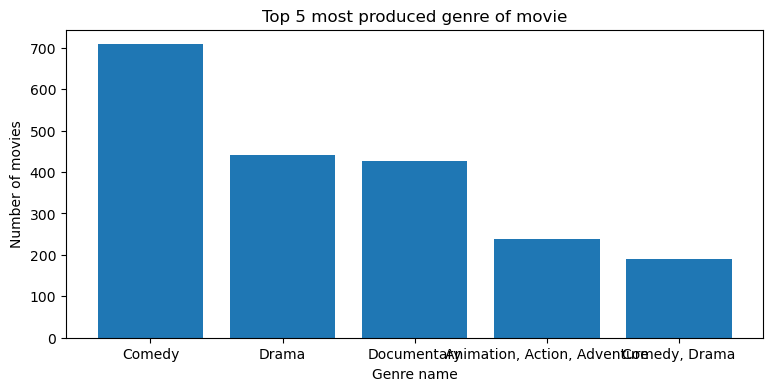

In [92]:
genre_count = my_df["GENRE"].value_counts().sort_values(ascending = False).head()
plt.figure(figsize = (9, 4))
plt.bar(genre_count.index, genre_count.values)
plt.title("Top 5 most produced genre of movie")
plt.xlabel("Genre name")
plt.ylabel("Number of movies")
plt.show();

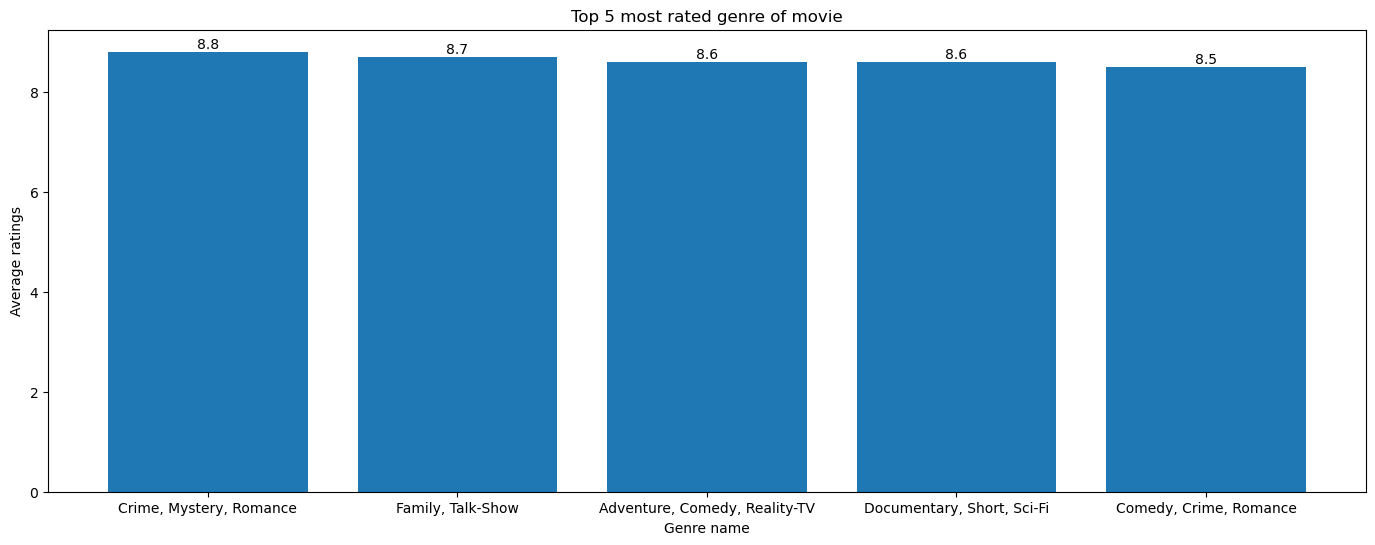

In [93]:
#Top 5 GENRE of movie by average Ratings
ratings = my_df.groupby("GENRE")["RATING"].mean().sort_values(ascending = False).head()
plt.figure(figsize = (17, 6))
bars = plt.bar(ratings.index, ratings.values)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}', ha='center', va='bottom')
plt.title("Top 5 most rated genre of movie")
plt.xlabel("Genre name")
plt.ylabel("Average ratings")
plt.show();

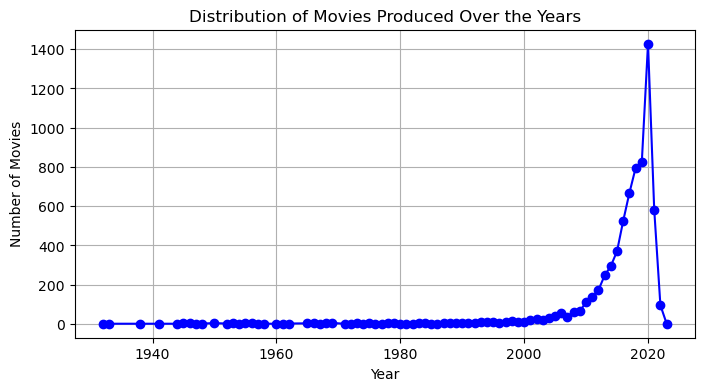

In [94]:
#Convert the year column to integer to make visualization possible
my_df['START YEAR'] = my_df['START YEAR'].astype(str).str[:4].astype(int)

# Count the number of movies per year and sort by year
yearly_counts = my_df["START YEAR"].value_counts().sort_index()

# Plotting the distribution
plt.figure(figsize=(8, 4))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-', color='b')
plt.title("Distribution of Movies Produced Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.grid(True)
plt.show()

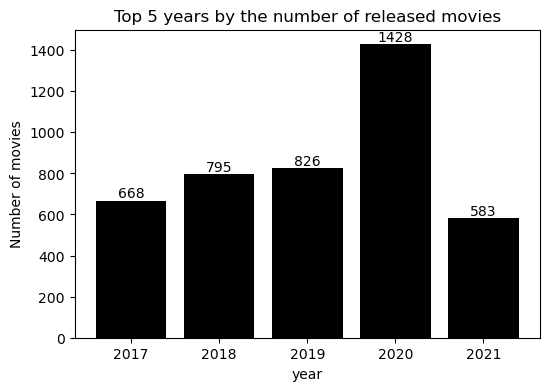

In [95]:
year = my_df["START YEAR"].value_counts().sort_values(ascending = False).head()
month_df = pd.DataFrame(year)
plt.figure(figsize = (6, 4))
bars = plt.bar(month_df["START YEAR"].index, month_df["START YEAR"].values, color = "black")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}', ha='center', va='bottom')
plt.title("Top 5 years by the number of released movies")
plt.xlabel("year")
plt.ylabel("Number of movies")
plt.show;

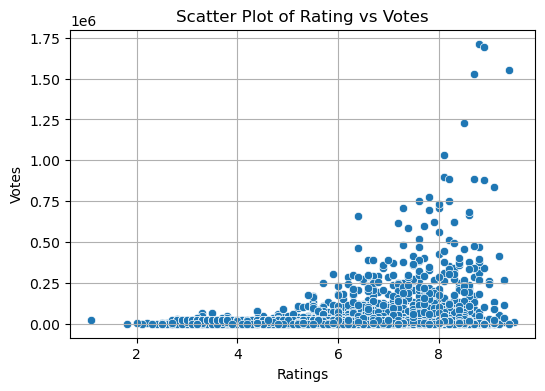

In [96]:
#To check if there is any correlation between Rating and Votes
plt.figure(figsize=(6, 4))
sns.scatterplot(x='RATING', y='VOTES', data=my_df)
plt.title('Scatter Plot of Rating vs Votes')
plt.xlabel('Ratings')
plt.ylabel('Votes')
plt.grid(True)
plt.show()

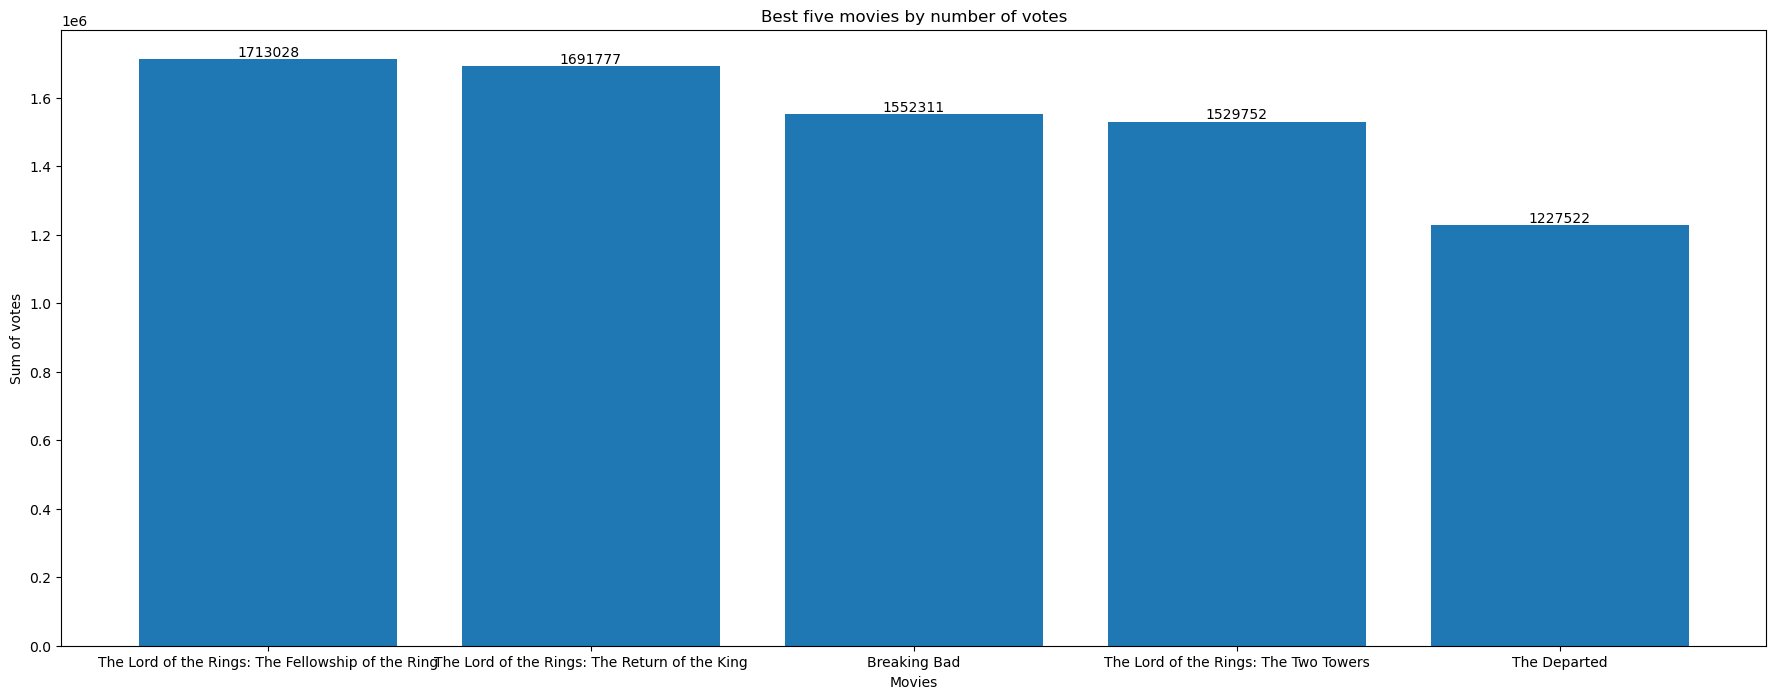

In [97]:
total_votes = my_df.groupby('MOVIES')['VOTES'].sum().sort_values(ascending = False).head()
plt.figure(figsize = (22, 8))
bars = plt.bar(total_votes.index, total_votes.values)

# Add labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Movies')
plt.ylabel('Sum of votes')
plt.title('Best five movies by number of votes')

# Show plot
plt.show();

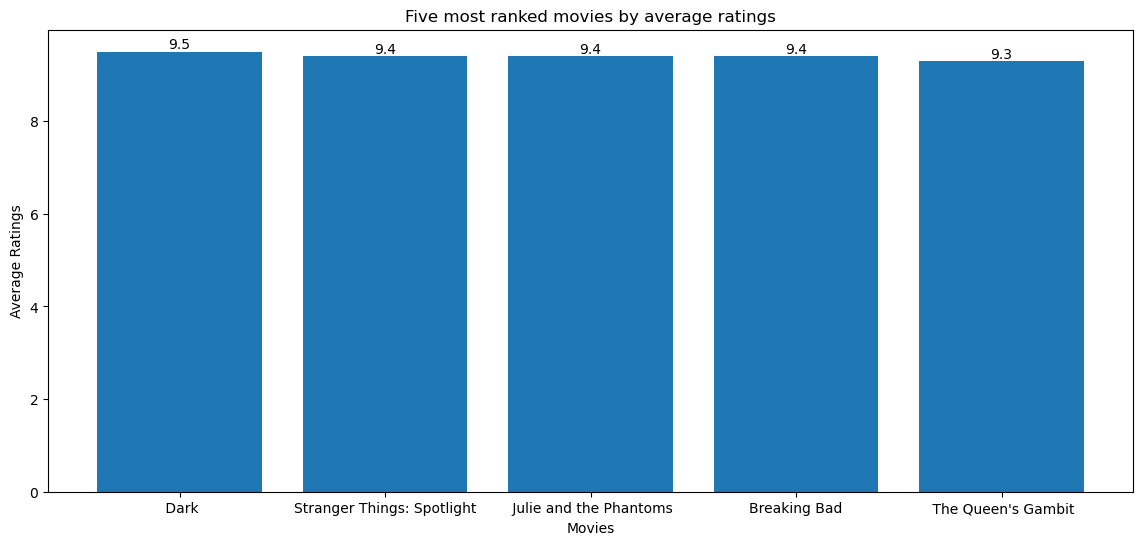

In [98]:
movie_rating = my_df.groupby('MOVIES')['RATING'].mean().sort_values(ascending = False).head()
plt.figure(figsize = (14, 6))
bars = plt.bar(movie_rating.index, movie_rating.values)

# Add labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Movies')
plt.ylabel('Average Ratings')
plt.title('Five most ranked movies by average ratings')

# Show plot
plt.show();

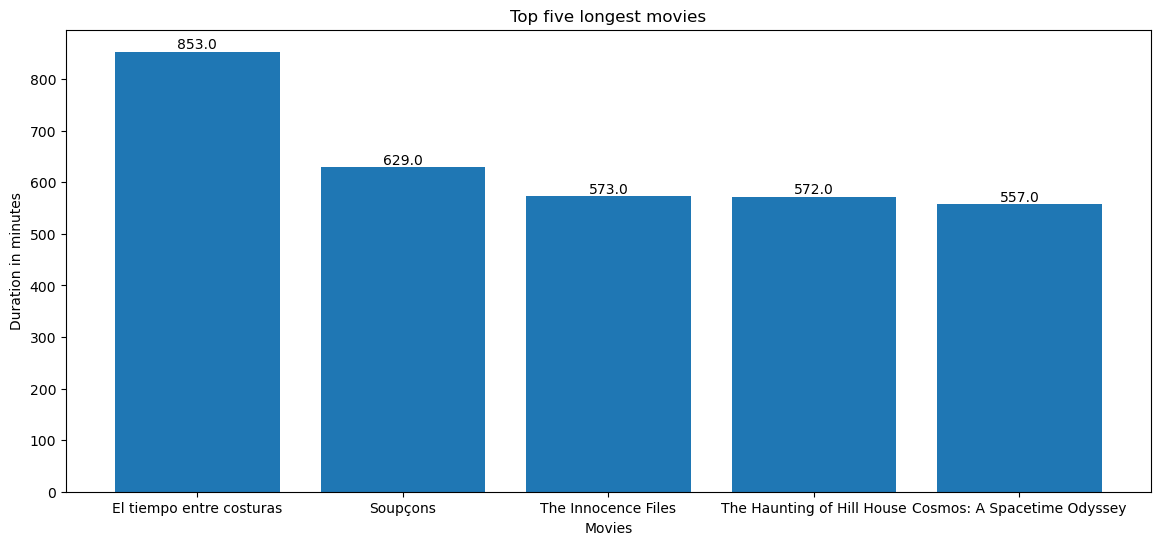

In [99]:
movie_duration = my_df.groupby('MOVIES')['RunTime(mins)'].sum().sort_values(ascending = False).head()
plt.figure(figsize = (14, 6))
bars = plt.bar(movie_duration.index, movie_duration.values)

# Add labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Movies')
plt.ylabel('Duration in minutes')
plt.title('Top five longest movies')

# Show plot
plt.show();

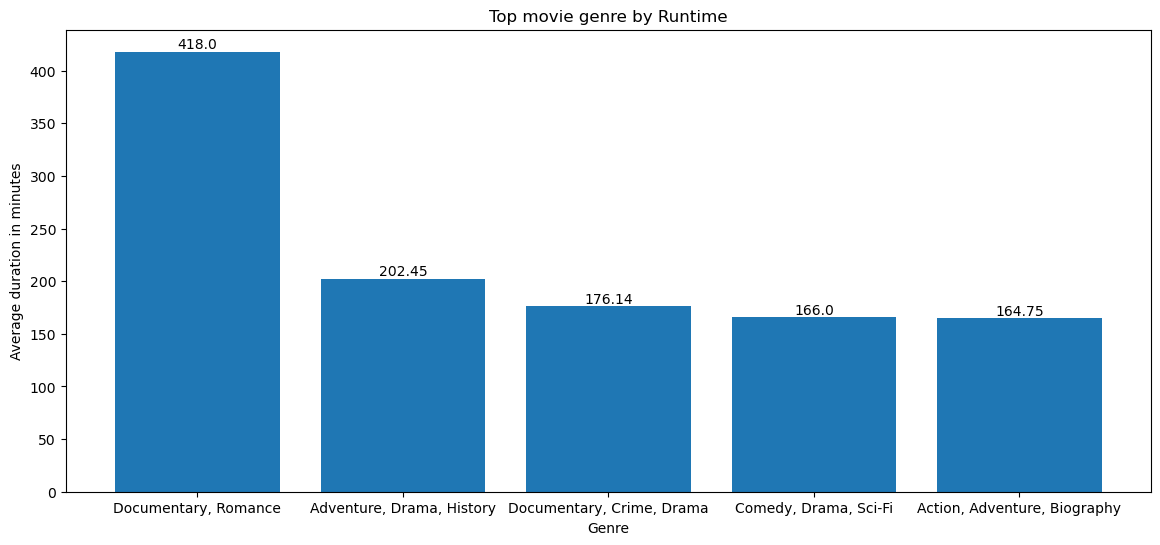

In [100]:
genre_duration = my_df.groupby('GENRE')['RunTime(mins)'].mean().round(2).sort_values(ascending = False).head()
plt.figure(figsize = (14, 6))
bars = plt.bar(genre_duration.index, genre_duration.values)

# Add labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Genre')
plt.ylabel('Average duration in minutes')
plt.title('Top movie genre by Runtime')

# Show plot
plt.show();

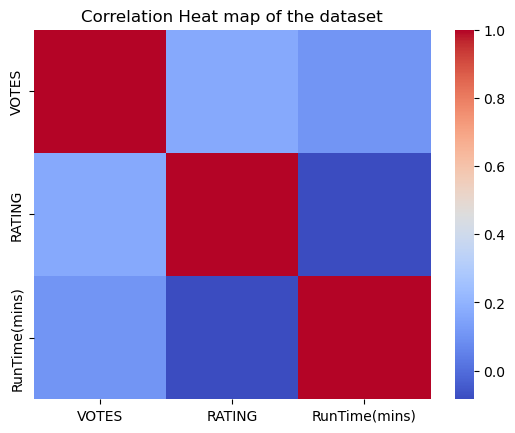

In [101]:
#To check out the correlation between the numerical column
numeric_df = my_df[["VOTES", "RATING", "RunTime(mins)"]]
correlation_map = numeric_df.corr()
sns.heatmap(correlation_map, cmap = 'coolwarm')
plt.title('Correlation Heat map of the dataset')
plt.show();

###### Insight from correlation map
* A  very weak positive correlation or relationship between the RATING and the VOTES columns
* A very weak negative correlation or relationship between the RATING and the RunTime columns
* A weak positive correlation or relationship between the RunTime and the VOTES columns

### *`Data Analysis with SQL output`*

###### *From the Data analysis done with SQL, the following were the outputs:*
* Most voted movie >>> The Lord of the Rings: The fellowship of the Ring

* Movie with the longest runtime >>> El tiempo entre costuras with runtime of 853mins

* Year with the highest number of movies >>> 2020 (1770 movies)

* Genre with the highest number of movies >>> Comedy (797 movies)

Kindly find attached the SQL script